<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/Rcnn_loss_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## C. Bounding-box regression(경계상자 회귀)

we use a simple bounding-box regression stage to improve localization performance. After scoring each selective search proposal with a class-specific detection SVM,  we predict a new bounding box for the detection using a  class-specific bounding-box regressor. This is similar in  spirit to the bounding-box regression used in deformable  part models [17]. The primary difference between the two  approaches is that here we regress from features computed  by the CNN, rather than from geometric features computed  on the inferred DPM part locations.


우리는 locaization성능을 향상 시키기 위해 간단한 bounding-box regression을 사용합니다. 클래스 별 탐지 SVM으로 각각의 selective search proposal에 점수를 부여한 후 한 후, 클래스 별 bounding box regresssor를 사용하여 탐지를위한 새로운 bounding box를 예측합니다. 이것은 DPM( deformable part models)에 사용되는 bounding box regression와 비슷합니다 [17]. 두 가지 접근 방식의 주요 차이점은 추론된 DPM 부분 위치에서 계산 된 기하학적 features으로 부터가 아닌, CNN에 의해 계산된 features로부터 회귀하는 것입니다.

The input to our training algorithm is a set of N training pairs {(P  i  , Gi  )}i=1,...,N , where P  i = (P  i  x  , Pi  y  , Pi  w, Pi  h  )  specifies the pixel coordinates of the center of proposal P  i  ’s  bounding box together with P  i  ’s width and height in pixels.  Hence forth, we drop the superscript i unless it is needed.  Each ground-truth bounding box G is specified in the same  way: G = (Gx, Gy, Gw, Gh). Our goal is to learn a transformation that maps a proposed box P to a ground-truth box  G.  

훈련 알고리즘에 대한 입력은 N 훈련 쌍 {(P i , Gi )}i=1,...,N의 집합입니다. 여기서 Pi = (P i x , Pi y , Pi w, Pi h ) 는 제안된 P i 의 너비 및 높이(픽셀 단위)와 함께 Pi 의 bonding box 중심 픽셀 좌표를 나타냅니다. 앞으로는 경우가 아니면 위첨자 i를 삭제합니다. 각 ground-truth bounding box G도 동일한 방식으로 지정됩니다. G = (Gx, Gy, Gw, Gh). 우리의 목표는 제안된 bounding box P를 ground-truth bounding box G로 매핑하는 변환을 학습하는 것입니다.

We parameterize the transformation in terms of four
functions dx(P), dy(P), dw(P), and dh(P). The first
two specify a scale-invariant translation of the center of
P’s bounding box, while the second two specify log-space
translations of the width and height of P’s bounding box.
After learning these functions, we can transform an input
proposal P into a predicted ground-truth box Gˆ by applying the transformation

우리는 4개의 function dx(P), dy(P), dw(P) 및 dh(P)를 이용해 이 변환을 파라미터화 합니다. 첫번째
두 개의 function은 bounding box P의 scale invariant 변환을 나타내며, 나머지 function 2개는 log-space 변환을 나타냅니다.
이 function들을 학습시킨 후 이 변환을 적용하여, 입력을 제안 P를 ground-truth bounding box G^으로 변환시킬 수 있습니다.

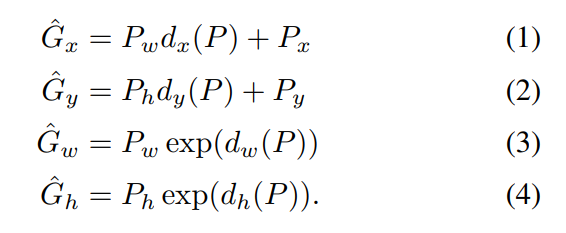

Each function d'?'(P) (where '?' is one of x, y, h, w) is  modeled as a linear function of the pool5  features of proposal P, denoted by φ5  (P). (The dependence of φ5  (P)  on the image data is implicitly assumed.) Thus we have  d'?'(P) = wT  '?'φ5  (P), where w'?' is a vector of learnable  model parameters. We learn w'?' by optimizing the regularized least squares objective (ridge regression):

각 함수 d?(P)(여기서 '?'는 x, y, h, w 중 하나임, 논문에서는 star모양으로 표기되어 있음.)는 φ5(P)로 표시되며, 제안된 P에 대한 pool5 featrues의 linear function으로 모델링됩니다. (이미지 데이터에 대한 φ5(P)의 의존성은 암묵적으로 가정됩니다.) 따라서 d?(P) = wT ?φ5(P)이고, w? 학습 가능한 모델 매개변수의 벡터입니다. 우리는 정규화된 최소 제곱 목표(릿지 회귀)를 최적화하여 w?를 학습시킵니다.

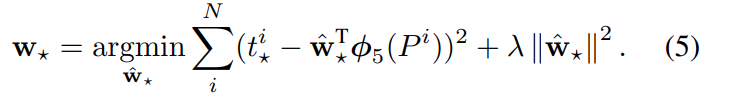

The regression targets t'?' for the training pair (P, G) are defined as

Training 쌍(P, G)에 대한 Regresssion target t'?'는 다음과 같이 정의됩니다.

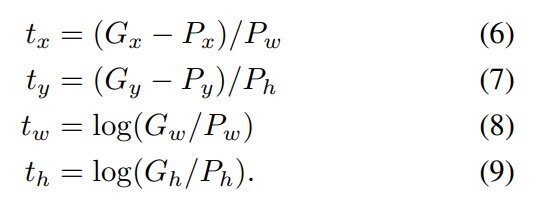

As a standard regularized least squares problem, this can be  solved efficiently in closed form.

이것들은 표준 정규화 최소 제곱 문제로서, closed form을 통해 효율적으로 풀 수 있습니다.

We found two subtle issues while implementing
bounding-box regression. The first is that regularization
is important: we set λ = 1000 based on a validation set.
The second issue is that care must be taken when selecting
which training pairs (P, G) to use. Intuitively, if P is far
from all ground-truth boxes, then the task of transforming
P to a ground-truth box G does not make sense. Using examples like P would lead to a hopeless learning problem.
Therefore, we only learn from a proposal P if it is nearby
at least one ground-truth box. We implement “nearness” by
assigning P to the ground-truth box G with which it has
maximum IoU overlap (in case it overlaps more than one) if
and only if the overlap is greater than a threshold (which we
set to 0.6 using a validation set). All unassigned proposals
are discarded. We do this once for each object class in order
to learn a set of class-specific bounding-box regressors.

bounding-box regression를 구현하는 동안 두 가지 미묘한 문제를 발견했습니다. 첫 번째는 regularizaton(정규화)가 중요하다는 것입니다. validation set를 기반으로 λ = 1000으로 설정합니다. 두 번째 문제는 사용할 training 쌍(P, G)을 선택할 때 주의를 기울여야 한다는 것입니다. 직관적으로 P가 모든 ground-truth box와 거리가 멀면 P를 ground-truth box G로 변환하는 작업이 의미가 없습니다. P와 같은 examples를 사용하는 것은 가망없는 학습 문제로 이어질 것입니다. 따라서 제안된 P가 적어도 하나의 ground-truth box 근처에 있는 경우에만 제안 P에서 학습합니다. 중첩이 임계값(validation set를 사용하여 0.6으로 설정)보다 큰 경우에만 최대 IoU 중첩(하나 이상 중첩되는 경우)이 있는 ground-truth box G에 P를 할당하여 "nearness(근접성)"을 구현합니다. 할당되지 않은 모든 제안은 폐기됩니다. 클래스별 bounding-box regressors 집합을 학습하기 위해 각 개체 클래스에 대해 이 작업을 한 번 수행합니다.

At test time, we score each proposal and predict its new  detection window only once. In principle, we could iterate  this procedure (i.e., re-score the newly predicted bounding  box, and then predict a new bounding box from it, and so  on). However, we found that iterating does not improve  results.

테스트 시간에 각 제안에 점수를 매기고 새로운 detection window을 한 번만 예측합니다. 원칙적으로, 우리는이 절차를 반복 할 수 있습니다 (즉, 새로 예측 된 bounding box에 다시 점수를 매기고, 그것으로부터 다음 bounding box를 예측하는 것 등). 그러나 반복이 결과를 향상시키지 않는다는 것을 발견했습니다.

## D. Additional feature visualizations(추가적인 feature 시각화)

Figure 12 shows additional visualizations for 20 pool5  units. For each unit, we show the 24 region proposals that  maximally activate that unit out of the full set of approximately 10 million regions in all of VOC 2007 test.  We label each unit by its (y, x, channel) position in the  6 × 6 × 256 dimensional pool5  feature map. Within each  channel, the CNN computes exactly the same function of  the input region, with the (y, x) position changing only the  receptive field.

그림 12는 20개의 pool5 unit들에 대한 추가적인 시각화를 보여줍니다. 각 unit에 대해 모든 VOC 2007 테스트에서 약 1,000만 개의 전체 지역 집합 중에서 해당 unit을 최대로 활성화하는 24개의 region proposal을 보여줍니다. 6 × 6 × 256 차원 pool5 feature map에서 각 unit의 (y, x, channel) 위치로 레이블을 지정합니다. 각 채널 내에서 CNN은 receptive field만 변경하는 (y, x) 위치와 함께 input region의 정확히 동일한 function을 계산합니다.

## E. Per-category segmentation results

In Table 7 we show the per-category segmentation accuracy on VOC 2011 val for each of our six segmentation  methods in addition to the O2P method [4]. These results  show which methods are strongest across each of the 20  PASCAL classes, plus the background class.

표 7에서는 O2P 방법[4] 외에 6가지 세분화 방법 각각에 대한 VOC 2011 val에 대한 범주별 세분화 정확도를 보여줍니다. 이 결과는 20개의 PASCAL class와 백그라운드 class 각각에서 어떤 방법이 가장 강력한지 보여줍니다.

## F. Analysis of cross-dataset redundancy

One concern when training on an auxiliary dataset is that  there might be redundancy between it and the test set. Even  though the tasks of object detection and whole-image classification are substantially different, making such cross-set  redundancy much less worrisome, we still conducted a thorough investigation that quantifies the extent to which PASCAL test images are contained within the ILSVRC 2012  training and validation sets. Our findings may be useful to  researchers who are interested in using ILSVRC 2012 as  training data for the PASCAL image classification task.

보조 데이터 세트에서 트레이닝할 때 한 가지 우려 사항은 보조 데이터 세트와 테스트 세트 사이에 중복이 있을 수 있다는 것입니다. object detection과 전체 전체 이미지 classification 작업이 실질적으로 다르기 때문에 이러한 교차 세트 중복이 훨씬 덜 걱정되지만, 우리는 여전히 PAS CAL 테스트 이미지가 ILSVRC 2012 교육 및 검증 세트 내부에 포함되는 정도를 정량화하는 철저한 조사를 수행했습니다. 우리의 연구 결과는 ILSVRC 2012를 PASCAL 이미지 classification 작업을 위한 training 데이터로 사용하는 데 관심이 있는 연구자들에게 유용할 수 있습니다.

We performed two checks for duplicate (and near duplicate) images. The first test is based on exact matches  of flickr image IDs, which are included in the VOC 2007  test annotations (these IDs are intentionally kept secret for  subsequent PASCAL test sets). All PASCAL images, and  about half of ILSVRC, were collected from flickr.com. This  check turned up 31 matches out of 4952(0.63%.)

중복(및 거의 중복) 이미지에 대해 두 가지 검사를 수행했습니다. 첫 번째 테스트는 VOC 2007 테스트 주석에 포함된 flickr 이미지 ID의 정확한 매칭을 기반으로 합니다(이러한 ID는 후속 PASCAL 테스트 세트에 대해 의도적으로 비밀로 유지됨). 모든 PASCAL 이미지와 ILSVRC의 약 절반은 flickr.com에서 수집되었습니다. 이러한 검사는 4952(0.63%)개 중 31개의 일치 항목을 찾았습니다.

The second check uses GIST [30] descriptor matching,  which was shown in [13] to have excellent performance at  near-duplicate image detection in large (> 1 million) image  collections. Following [13], we computed GIST descriptors on warped 32 × 32 pixel versions of all ILSVRC 2012  trainval and PASCAL 2007 test images.

두 번째 검사는 GIST [30] 디스크립터 매칭을 사용하는데, 이는 [13]에서 대규모(> 1백만) 이미지 컬렉션에서 거의 중복된 이미지 감지에서 탁월한 성능을 보이는 것으로 나타났습니다. [13]에 따라 모든 ILSVRC 2012 trainval 및 PASCAL 2007 테스트 이미지의 warped 32 × 32 픽셀 버전에서 GIST 디스크립터를 계산했습니다.

Euclidean distance nearest-neighbor matching of GIST  descriptors revealed 38 near-duplicate images (including all  31 found by flickr ID matching). The matches tend to vary  slightly in JPEG compression level and resolution, and to a  lesser extent cropping. These findings show that the overlap  is small, less than 1%.  For VOC 2012, because flickr IDs
are not available, we used the GIST matching method only.
Based on GIST matches, 1.5% of VOC 2012 test images
are in ILSVRC 2012 trainval. The slightly higher rate for
VOC 2012 is likely due to the fact that the two datasets
were collected closer together in time than VOC 2007 and
ILSVRC 2012 were.


GIST 디스크립터의 유클리드 거리 최근접 이웃 매칭은 38개의 거의 중복된 이미지를 나타냅니다(flickr ID 일치로 찾은 31개 모두 포함). 매치된 것들은 JPEG 압축 수준 및 해상도에서 약간씩 달라지는 경향이 있으며 크롭 범위는 더 적습니다. 이러한 결과는 overlapp이 1% 미만으로 작다는 것을 보여줍니다.

## G. Analysis of cross-dataset redundancy

This document tracks the progress of R-CNN. To help  readers understand how it has changed over time, here’s a  brief changelog describing the revisions.

이 문서는 R-CNN의 진행 상황을 추적합니다. 독자가 시간이 지남에 따라 어떻게 변경되었는지 이해하는 데 도움이 되도록 수정 사항을 설명하는 간단한 변경 로그가 있습니다.

v1 Initial version.


v1 초기버전

v2 CVPR 2014 camera-ready revision. Includes substantial improvements in detection performance brought about
by (1) starting fine-tuning from a higher learning rate (0.001
instead of 0.0001), (2) using context padding when preparing CNN inputs, and (3) bounding-box regression to fix localization error.

v2 CVPR 2014 카메라 지원 버전. 감지 성능의 실질적인 개선을 포함합니다.
(1) 더 높은 학습률(0.001사용, 0.0001 대신)에서 fine tuning을 시작, (2) CNN 입력을 준비할 때 컨텍스트 패딩 사용, (3) localization 오류를 수정하기 위한 bounding-box regression.

v3 Results on the ILSVRC2013 detection dataset and comparison with OverFeat were integrated into several sections
(primarily Section 2 and Section 4).

v3 ILSVRC2013 detection 데이터 세트에 대한 결과 및 OverFeat와의 비교가 여러 섹션으로 통합되었습니다.
(주로 섹션 2 및 섹션 4).

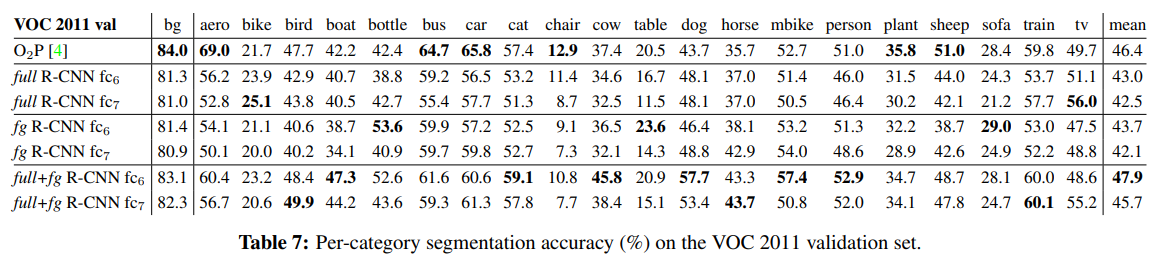

v4 The softmax vs. SVM results in Appendix B contained
an error, which has been fixed. We thank Sergio Guadarrama for helping to identify this issue.

v4 포함된 부록 B의 softmax 대 SVM 결과
오류가 수정되었습니다. 이 문제를 식별하는 데 도움을 주신 Sergio Guadar rama에게 감사드립니다.

v5 Added results using the new 16-layer network architecture from Simonyan and Zisserman [43] to Section 3.3 and
Table 3.

v5 Simonyan 및 Zisserman[43]의 새로운 16계층 네트워크 아키텍처를 사용한 결과를 섹션 3.3 및
표 3.